In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
emotions_csv = pd.read_csv('emotions.csv', header=0)

In [4]:
duplicates = emotions_csv.groupby('word')['context'].unique()
duplicates[duplicates.str.len() > 1]

Series([], Name: context, dtype: object)

In [5]:
emotions = {}
for index, row in emotions_csv.iterrows():
    # lemmatize
    word = WordNetLemmatizer().lemmatize(row.word)
    emotions[word] = {
        'context': row.context,
        'category': row.category
    }

print(len(emotions), 'word(s)')

344 word(s)


In [6]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [7]:
df = pd.read_csv('..\\tweets_sentiment.csv', header=0)

In [8]:
def get_emotions(tweet):
    # clean string
    tweet = str(tweet)
    tweet = tweet.lower()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # get words
    tokenized_words = word_tokenize(tweet, "english")

    # remove stopwords
    final_words = []
    for word in tokenized_words:
        if word not in stop_words:
            final_words.append(word)

    # lemetaize words
    lemma_words = []
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)

    # check emotion
    emotion = ['other', 'other']
    for word in lemma_words:
        if word in emotions:
            emotion = [emotions[word]['context'], emotions[word]['category']]
            break

    # retunr a list of emotions
    return pd.Series(emotion)

In [9]:
df[['emotion', 'emotion_category']] = df.translated_text.apply(get_emotions)

In [10]:
df[['translated_text', 'emotion', 'emotion_category']].head()

,translated_text,emotion,emotion_category
0,#Corona #COVIDー19 Official Numbers in Lebanon ...,other,other
1,# Corona_Lebanon\n#coronavirus,other,other
2,"The management of the ""Palma"" resort explains ...",other,other
3,Urgent: The Lebanese Ministry of Health: 415 C...,other,other
4,"Finally, the 7 of September gets rid of the ge...",other,other


In [11]:
def get_context(df_):
    result = df_.groupby('emotion').count().reset_index()[['emotion', 'translated_text']]
    result = result.rename(columns={result.columns[1]: 'count_'})
    return result

def pie_plot(df_):
    fig1, ax1 = plt.subplots(figsize=(10, 7))
    ax1.pie(df_.count_.values.tolist(), labels=df_.emotion.values.tolist())
    ax1.axis('equal')
    plt.show()

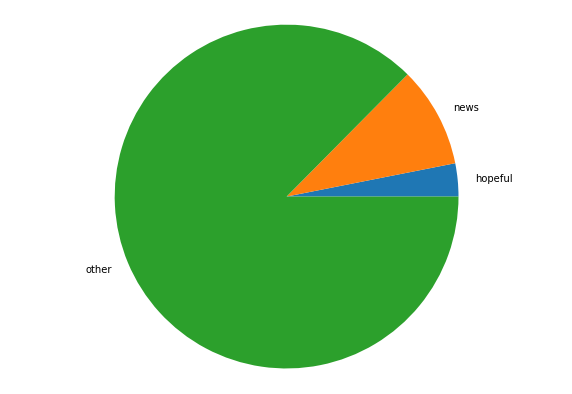

In [12]:
pos_data = get_context(df[ (df.sentiment_label2 == 'POSITIVE') & (df.emotion_category != 'negative') ])
pie_plot(pos_data)

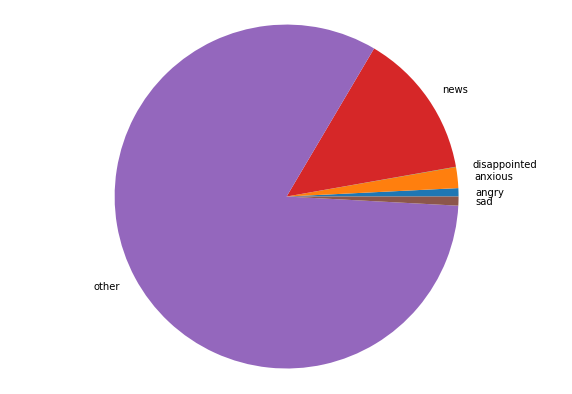

In [13]:
neg_data = get_context(df[ (df.sentiment_label2 == 'NEGATIVE') & (df.emotion_category != 'positive') ])
pie_plot(neg_data)